<a href="https://colab.research.google.com/github/2303A52135/Explainable-ai-lab/blob/main/Assignment_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skill Boost – Coding Bootcamp

Context:

Skill Boost sees that attending free webinars leads to higher course sign-ups.

Webinars Attended(x) 0 1 2 0 1

Sign-ups(y) 5 15 25 8 18

Objective:

Analyze the effect of attending free webinars on the number of sign-ups for Skill Boost's coding boot camp by performing Linear Regression and interpreting SHAP values. Requirements:

Perform Linear Regression Analysis o Use the given dataset where: ▪ Independent Variable (x): Webinars Attended ▪ Dependent Variable (y): Sign-ups
Calculate the Baseline Value o Compute the mean of all sign-up values (y values).
Calculate SHAP Values o For each record, calculate the difference between the predicted value and the baseline. o This difference is the SHAP value, attributed to the number of webinars attended.
Compute Final Prediction o Use the linear regression model to calculate predicted sign-ups for each webinar count. o Confirm that: Final Prediction=Baseline+SHAP Value\text{Final Prediction} = \text{Baseline}
\text{SHAP Value}Final Prediction=Baseline+SHAP Value
Interpret the Results o Explain how the number of webinars attended influenced each predicted sign-up count. o Compare the predicted value to the actual value for each row. o Identify under prediction or over prediction, and provide reasoning.

Deliverables: • Linear regression implementation with coefficients • Baseline (mean of y) • Table of SHAP values and predictions • Explanation of how each input influenced the prediction • Comparison of predicted vs actual values, with over/under prediction notes • Summary analysis covering: ▪ Accuracy of the model ▪ Trend analysis ▪ SHAP interpretation insights

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

x = np.array([0, 1, 2, 0, 1]).reshape(-1, 1)
y = np.array([5, 15, 25, 8, 18])


model = LinearRegression()
model.fit(x, y)

coef = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Coefficient (slope): {coef:.4f}")
print(f"Linear Regression Intercept: {intercept:.4f}")


baseline = np.mean(y)
print(f"\nBaseline (mean of sign-ups): {baseline:.4f}")


predictions = model.predict(x)

shap_values = predictions - baseline

df = pd.DataFrame({
    "Webinars Attended (x)": x.flatten(),
    "Actual Sign-ups (y)": y,
    "Predicted Sign-ups": predictions.round(2),
    "Baseline": [baseline]*len(y),
    "SHAP Value": shap_values.round(2),
    "Over/Under Prediction": np.where(predictions > y, "Over",
                                      np.where(predictions < y, "Under", "Exact"))
})

print("\nResults Table:")
print(df)

print("\n")
for i in range(len(x)):
    print(f"Record {i+1}: Attended {x[i][0]} webinars → Prediction: {predictions[i]:.2f}, "
          f"Actual: {y[i]}, SHAP: {shap_values[i]:.2f} "
          f"({df['Over/Under Prediction'][i]} Prediction)")

from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)

print("\n")
print(f"Model Accuracy (R²): {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print("Trend: More webinars attended → higher predicted sign-ups.")
print("SHAP Insight: Positive SHAP values indicate more sign-ups predicted than baseline; "
      "negative SHAP values indicate fewer than baseline.")
print("Over-predictions occur when model predicts higher sign-ups than actual; "
      "under-predictions occur when actual is higher than predicted.")

Linear Regression Coefficient (slope): 9.3571
Linear Regression Intercept: 6.7143

Baseline (mean of sign-ups): 14.2000

Results Table:
   Webinars Attended (x)  Actual Sign-ups (y)  Predicted Sign-ups  Baseline  \
0                      0                    5                6.71      14.2   
1                      1                   15               16.07      14.2   
2                      2                   25               25.43      14.2   
3                      0                    8                6.71      14.2   
4                      1                   18               16.07      14.2   

   SHAP Value Over/Under Prediction  
0       -7.49                  Over  
1        1.87                  Over  
2       11.23                  Over  
3       -7.49                 Under  
4        1.87                 Under  


Record 1: Attended 0 webinars → Prediction: 6.71, Actual: 5, SHAP: -7.49 (Over Prediction)
Record 2: Attended 1 webinars → Prediction: 16.07, Actual: 15, SHAP:

2. FinTrack – Investment Signup Prediction using Multiple Linear Regression and SHAP Analysis

Objective:

Evaluate how the number of webinars and blog posts published influence new user signups using Multiple Linear Regression and explain the outcomes using SHAP value interpretation.

Given Dataset:

Webinars (x₁) 3 2 1 4 2

Blogs (x₂) 5 3 4 2 1

Signu ps (y) 60 45 40 55 35

Tasks:

Perform Multiple Linear Regression Analysis o Use Webinars and Blogs as independent variables o Use Signups as the dependent variable
Calculate the Baseline Value o Compute the mean of all signup values
Calculate SHAP Values o Calculate SHAP Value o Distribute SHAP contributions between Webinars and Blogs based on model coefficients
Compute Final Prediction for Each Record o Use the regression equation o Verify: Prediction = Baseline + SHAP (Webinars) + SHAP (Blogs)
Interpret the Results o For each record, explain how webinars and blogs affected the prediction o Compare predicted vs actual signup values o Indicate if the model overpredicted or underpredicted and suggest possible causes

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

webinars = np.array([3, 2, 1, 4, 2])
blogs    = np.array([5, 3, 4, 2, 1])
signups  = np.array([60, 45, 40, 55, 35])

X = np.column_stack((webinars, blogs))

model = LinearRegression()
model.fit(X, signups)

coef_webinars, coef_blogs = model.coef_
intercept = model.intercept_

print(f"Coefficient for Webinars: {coef_webinars:.4f}")
print(f"Coefficient for Blogs: {coef_blogs:.4f}")
print(f"Intercept: {intercept:.4f}")

baseline = np.mean(signups)
print(f"\nBaseline (mean of signups): {baseline:.4f}")


predictions = model.predict(X)

total_shap = predictions - baseline


shap_webinars = coef_webinars * (webinars - np.mean(webinars))
shap_blogs    = coef_blogs * (blogs - np.mean(blogs))


verify = baseline + shap_webinars + shap_blogs
assert np.allclose(predictions, verify), "Verification failed! Predictions mismatch."

df = pd.DataFrame({
    "Webinars": webinars,
    "Blogs": blogs,
    "Actual Signups": signups,
    "Predicted Signups": predictions.round(2),
    "Baseline": [baseline]*len(signups),
    "SHAP (Webinars)": shap_webinars.round(2),
    "SHAP (Blogs)": shap_blogs.round(2),
    "Total SHAP": total_shap.round(2),
    "Over/Under Prediction": np.where(predictions > signups, "Over",
                                      np.where(predictions < signups, "Under", "Exact"))
})

print("\nResults Table:")
print(df)


print("\nInterpretation ")
for i in range(len(signups)):
    effect_webinars = ("↑" if shap_webinars[i] > 0 else "↓") if shap_webinars[i] != 0 else "→"
    effect_blogs = ("↑" if shap_blogs[i] > 0 else "↓") if shap_blogs[i] != 0 else "→"
    print(f"Record {i+1}: Webinars {webinars[i]} ({effect_webinars} {shap_webinars[i]:.2f}), "
          f"Blogs {blogs[i]} ({effect_blogs} {shap_blogs[i]:.2f}) → "
          f"Pred: {predictions[i]:.2f}, Actual: {signups[i]}, "
          f"{df['Over/Under Prediction'][i]} Prediction")

r2 = r2_score(signups, predictions)
mae = mean_absolute_error(signups, predictions)

print("\n")
print(f"Model Accuracy (R²): {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print("Trend: Both webinars and blogs contribute positively/negatively depending on deviation from their mean.")
print("SHAP Insight: Each SHAP value shows how much that feature’s deviation from the average influenced prediction.")
print("Over-prediction means the model expected more signups than observed, possibly due to other unmeasured factors.")

Coefficient for Webinars: 7.7451
Coefficient for Blogs: 4.2745
Intercept: 15.5882

Baseline (mean of signups): 47.0000

Results Table:
   Webinars  Blogs  Actual Signups  Predicted Signups  Baseline  \
0         3      5              60              60.20      47.0   
1         2      3              45              43.90      47.0   
2         1      4              40              40.43      47.0   
3         4      2              55              55.12      47.0   
4         2      1              35              35.35      47.0   

   SHAP (Webinars)  SHAP (Blogs)  Total SHAP Over/Under Prediction  
0             4.65          8.55       13.20                  Over  
1            -3.10          0.00       -3.10                 Under  
2           -10.84          4.27       -6.57                  Over  
3            12.39         -4.27        8.12                  Over  
4            -3.10         -8.55      -11.65                  Over  

Interpretation 
Record 1: Webinars 3 (↑ 4.65), 

3.Regression with Diabetes Dataset

Objective:

Understand how patient features influence disease progression using Multiple Linear Regression and SHAP value analysis.

Tasks

Perform Multiple Linear Regression Analysis • Use all available features from the Diabetes dataset as independent variables. • Fit a Multiple Linear Regression model to predict disease progression.
Calculate the Baseline Value • Compute the mean of the target variable (disease progression scores) from the training data. • This will serve as the baseline prediction.
Calculate SHAP Values • Apply SHAP to compute feature contributions to each prediction. • Use model coefficients to proportionally attribute the difference from the baseline to each feature.
Compute Final Prediction for Each Record • For every test record, verify that: Prediction = Baseline + SHAP(Feature₁) + SHAP(Feature₂) + ... + SHAP(Featureₙ)
Interpret the Results • For each patient record: o Explain how each feature contributed to the predicted disease progression. o Compare the predicted value vs the actual observed value. o Comment on whether the model overpredicted or underpredicted and why, based on SHAP values


=== Model Performance ===
R² Score: 0.2550
RMSE: 0.4136

Baseline value (mean of y_train): 0.3469

=== SHAP Additivity Check ===
Sample 0: Predicted = 0.3355, SHAP Sum + Baseline = 0.3578
Sample 1: Predicted = 0.2381, SHAP Sum + Baseline = 0.2604
Sample 2: Predicted = 0.1511, SHAP Sum + Baseline = 0.1733

=== Prediction Explanations ===

Patient 1
Actual: 0.00, Predicted: 0.34 (Overpredicted)
Feature contributions:
  Pregnancies: 0.0296
  Glucose: -0.1440
  BloodPressure: 0.0265
  SkinThickness: 0.0068
  Insulin: -0.0265
  BMI: 0.0404
  DiabetesPedigreeFunction: 0.0007
  Age: 0.0773
Baseline: 0.35, Sum of SHAP: 0.0109, SHAP-based Prediction: 0.3578

Patient 2
Actual: 0.00, Predicted: 0.24 (Overpredicted)
Feature contributions:
  Pregnancies: -0.0122
  Glucose: -0.0651
  BloodPressure: -0.0123
  SkinThickness: 0.0063
  Insulin: 0.0264
  BMI: 0.0659
  DiabetesPedigreeFunction: -0.0307
  Age: -0.0648
Baseline: 0.35, Sum of SHAP: -0.0865, SHAP-based Prediction: 0.2604

Patient 3
Actual: 0

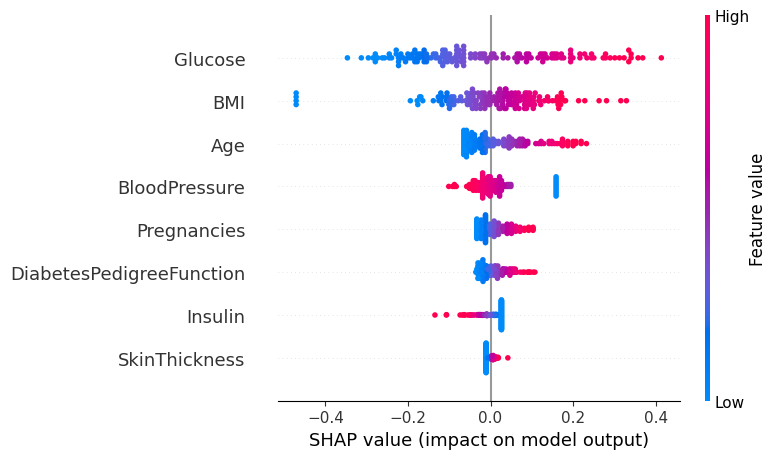

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap

# 1) Load dataset
df = pd.read_csv("/content/diabetes.csv")

# Assuming the last column is the target (disease progression)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2) Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model metrics
print("\n=== Model Performance ===")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 3) Baseline value
baseline_value = np.mean(y_train)
print(f"\nBaseline value (mean of y_train): {baseline_value:.4f}")

# 4) SHAP value calculation (LinearExplainer is ideal for linear regression)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Verify SHAP property for a few samples
print("\n=== SHAP Additivity Check ===")
for i in range(3):
    pred_calc = baseline_value + shap_values.values[i].sum()
    print(f"Sample {i}: Predicted = {y_pred[i]:.4f}, SHAP Sum + Baseline = {pred_calc:.4f}")

# 5) Detailed interpretation for each patient
print("\n=== Prediction Explanations ===")
for i in range(len(X_test)):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    shap_sum = shap_values.values[i].sum()
    pred_from_shap = baseline_value + shap_sum
    diff = predicted - actual
    status = "Overpredicted" if diff > 0 else "Underpredicted"

    print(f"\nPatient {i+1}")
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f} ({status})")
    print("Feature contributions:")
    for feat, contrib in zip(X.columns, shap_values.values[i]):
        print(f"  {feat}: {contrib:.4f}")
    print(f"Baseline: {baseline_value:.2f}, Sum of SHAP: {shap_sum:.4f}, SHAP-based Prediction: {pred_from_shap:.4f}")

# Optional: SHAP Summary Plot
shap.summary_plot(shap_values.values, X_test, feature_names=X.columns)

4.Regression with Student Performance Dataset

Objective:

Investigate how student background and behavior influence final exam scores using Multiple Linear Regression and SHAP value analysis.

Tasks

Perform Multiple Linear Regression Analysis • Use all relevant student attributes (e.g., study time, parental education, absences, etc.) as independent variables. • Fit a regression model to predict the final exam score.
Calculate the Baseline Value • Compute the mean of the final exam scores from the training set. • This serves as the baseline prediction (expected value).
Calculate SHAP Values • Use SHAP to compute the contribution of each student attribute to the final exam score prediction. • Distribute the prediction deviation from the baseline among the features.
Compute Final Prediction for Each Record • For each student record, confirm: Predicted Score = Baseline + SHAP(Feature₁) + SHAP(Feature₂) + ... + SHAP(Featureₙ)
Interpret the Results • For every prediction: o Explain how different features (e.g., study time, failures, health) impacted the exam score. o Compare predicted score to actual score. o Comment on overprediction or underprediction and possible reasons behind it.

Mean Squared Error: 1.4759092563639304
R² Score: 0.8486513286537316


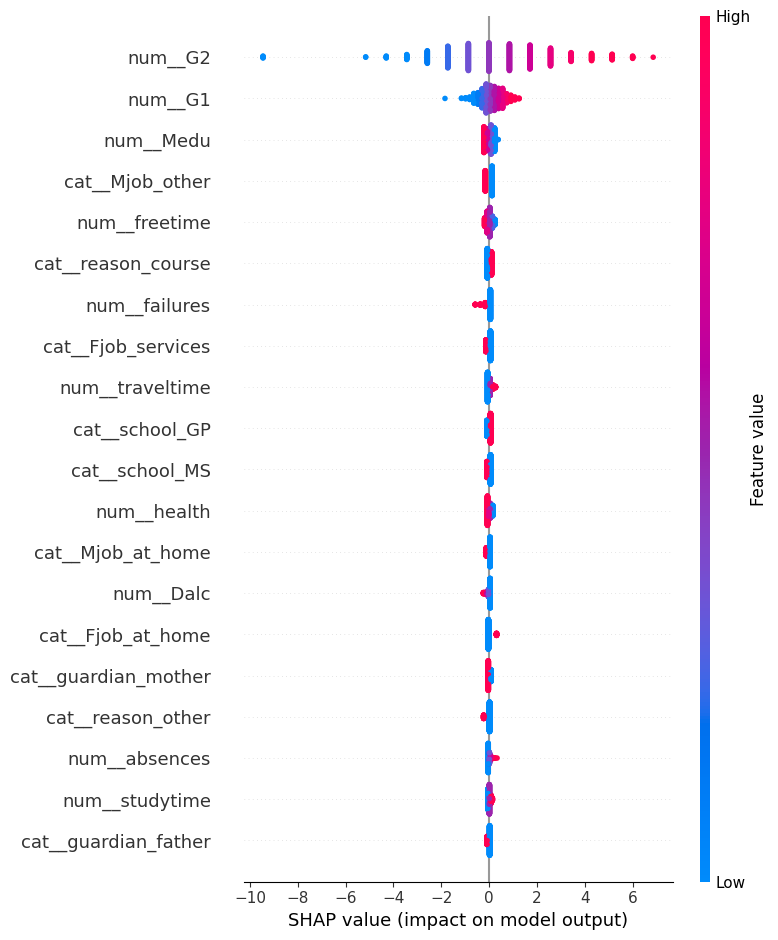

   Actual  Predicted  Predicted_Rounded
0      19  18.402656               18.0
1      12  11.827208               12.0
2      18  18.562886               19.0
3      11  10.809696               11.0
4      11  11.743240               12.0


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import matplotlib.pyplot as plt


# 1. Load Dataset

df = pd.read_csv("/content/student-por.csv")  # Change to your file path

# Assuming 'G3' is the final exam score
target_col = "G3"

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found. Available columns: {df.columns.tolist()}")


# 2. Features & Target

X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# 3. Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


# 4. Model Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# 5. Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 6. Train Model

model.fit(X_train, y_train)


# 7. Predictions

y_pred = model.predict(X_test)
y_pred_rounded = np.rint(y_pred)


# 8. Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


# 9. SHAP Explainability

# Get transformed training data for SHAP
X_train_transformed = preprocessor.fit_transform(X_train)

explainer = shap.Explainer(model.named_steps['regressor'], X_train_transformed)
shap_values = explainer(X_train_transformed)

# Summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=preprocessor.get_feature_names_out())


# 10. Optional: Compare Actual vs Predicted

results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Predicted_Rounded": y_pred_rounded
})
print(results_df.head())